The goal of the analysis is to find the genre which sold the most NA,JP and EU sales.(here NA = north america , JP = japan and EU = european union)


First we need to import all the necessary libraries for the analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                                                           
import seaborn as sns

In [ ]:
df = pd.read_csv("vgsales.csv")

In [ ]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


After viewing our data and its basic information now we need to check if there are any null values.

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

well we can ignoare the year and publishers because many games can be lanched from a same publisher in a same year.

In [ ]:
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


There are no duplicates in the data.

we will create graphs for the data  in the graphs we will arreange by the game which has as the highest revenue in decending order.

In [ ]:
 top_genre = df.groupby(['Genre']).sum().sort_values('NA_Sales', ascending = False)
top_genre = top_genre[['NA_Sales']].round(3)
top_genre.reset_index(inplace = True)

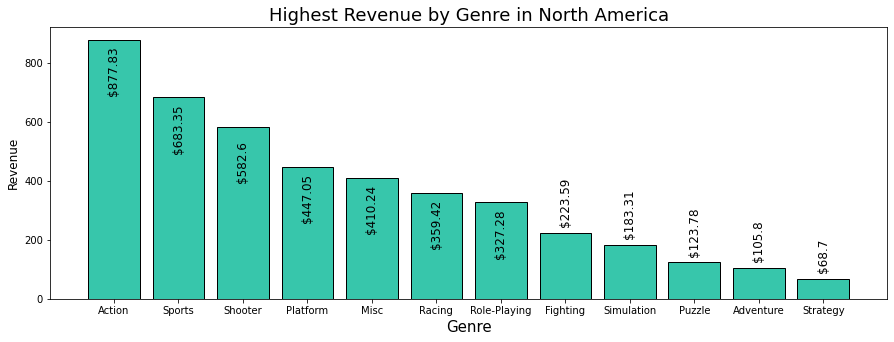

In [ ]:
plt.figure(figsize = (15,5))
plt.title('Highest Revenue by Genre in North America', fontsize = 18)
plt.bar(top_genre['Genre'], top_genre['NA_Sales'], color = '#37C6AB', edgecolor = 'black', linewidth = 1)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Revenue', fontsize = 12)
for k, v in top_genre['NA_Sales'].items():
    if v < 250:
        plt.text (k, v+30, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text (k, v-180, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

In [ ]:
top_genre = df.groupby(['Genre']).sum().sort_values('JP_Sales', ascending = False)
top_genre = top_genre[['JP_Sales']].round(3)
top_genre.reset_index(inplace = True)

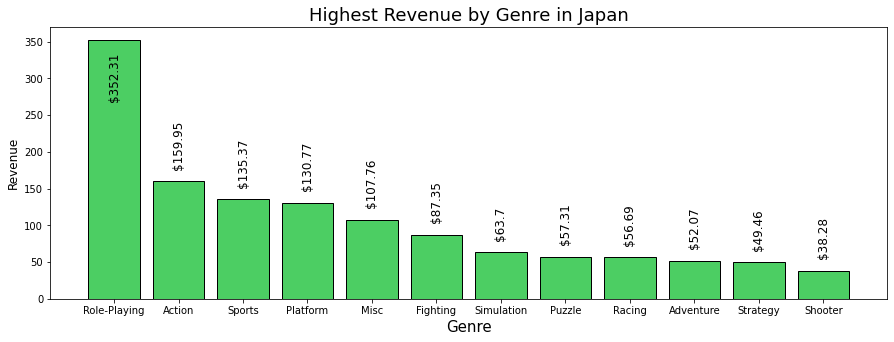

In [ ]:
plt.figure(figsize = (15,5))
plt.title('Highest Revenue by Genre in Japan', fontsize = 18)
plt.bar(top_genre['Genre'], top_genre['JP_Sales'], color = '#4CCE63', edgecolor = 'black', linewidth = 1)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Revenue', fontsize = 12)
for k, v in top_genre['JP_Sales'].items():
    if v > 300:
        plt.text (k, v-80, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text (k, v+20, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

In [ ]:
top_genre = df.groupby(['Genre']).sum().sort_values('EU_Sales', ascending = False)
top_genre = top_genre[['EU_Sales']].round(3)
top_genre.reset_index(inplace = True)

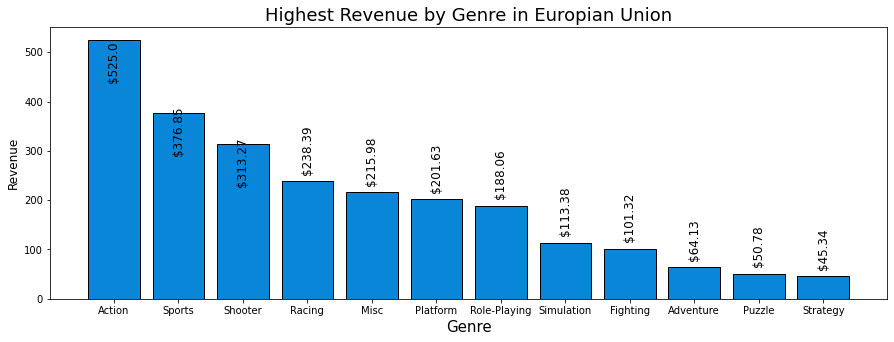

In [ ]:
plt.figure(figsize = (15,5))
plt.title('Highest Revenue by Genre in Europian Union', fontsize = 18)
plt.bar(top_genre['Genre'], top_genre['EU_Sales'], color = '#0A86D9', edgecolor = 'black', linewidth = 1)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Revenue', fontsize = 12)
for k, v in top_genre['EU_Sales'].items():
    if v > 300:
        plt.text (k, v-80, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text (k, v+20, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')

By the help of these three graphs we can find the most genre solds in the EU, JP and NA. In japan most people play role playing genre games rather than action games.